## 🛒 Shopper Spectrum: 


### Customer Segmentation and Product Recommendations in E-Commerce
##

In [157]:
# Import the necccessary lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('online_retail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Exploratory Data Analysis

#### Understanding the Dataset

In [9]:
df.shape

(541909, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
# Converting the String data field to datetime format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2023-07-04 13:34:57.156387072,4.611114,15287.690570
min,-80995.000000,2022-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2023-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2023-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2023-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2023-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Handling null and duplicates

In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df.isnull().sum()/len(df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [22]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2022-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2022-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2022-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2022-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2023-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2023-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2023-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2023-12-09 10:26:00,10.79,NaN,United Kingdom


In [24]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2022-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2022-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2023-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2023-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2023-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2023-12-08 10:33:00,0.0,NaN,United Kingdom


In [26]:
# Removing the null columns

df=df.dropna(subset=['CustomerID'], axis=0)

In [28]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [30]:
df.duplicated().sum()

5225

In [31]:
# dropping the duplicated rows

df=df.drop_duplicates()

In [32]:
df.shape

(401604, 8)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [35]:
#pd.set_option('display.max_rows', None)

### Handling Irrivalent / anamolies data

In [37]:
df['InvoiceNo'].value_counts()

InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: count, Length: 22190, dtype: int64

In [40]:
df['InvoiceNo'].str.startswith('C').sum()

8872

In [43]:
# droping the cancelled InvoiceNO.

df=df[~df['InvoiceNo'].str.startswith('C')]

In [45]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2023-07-10 19:15:24.576301312,3.125596,15287.734822
min,1.000000,2022-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2023-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2023-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2023-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2023-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


In [46]:
# Unit price might be 0 in the situations of offers/gifts or data error.

In [49]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2022-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2022-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2022-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2023-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2023-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2023-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2023-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2023-04-04 14:42:00,0.0,14410.0,United Kingdom


In [53]:
# Keeping the Price greater than 0

df=df[df['UnitPrice']>0]

In [55]:
df[df['UnitPrice']==8142.750000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2023-05-03 13:46:00,8142.75,16029.0,United Kingdom


### Indepth analysis the Quantity feature

In [58]:
# Analyzing the Quantity feature 

In [60]:
df[df['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [62]:
df[df['Quantity']==80995.000000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2023-12-09 09:15:00,2.08,16446.0,United Kingdom


In [64]:
df[df['Description']=='PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2023-12-09 09:15:00,2.08,16446.0,United Kingdom


In [66]:
# from the above we may know,

#---'PAPER CRAFT , LITTLE BIRDIE' is the only product has the highest Quantity bought by customer

In [68]:
df[df['CustomerID']==16446.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2023-05-18 09:52:00,1.65,16446.0,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,2023-05-18 09:52:00,1.25,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2023-12-09 09:15:00,2.08,16446.0,United Kingdom


In [70]:
df[df['Quantity']>=10000.000000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2023-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2023-12-09 09:15:00,2.08,16446.0,United Kingdom


In [72]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [74]:
df.shape

(392692, 8)

In [76]:
# Creating Revenue feature--->Helpful to find monetary

df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [78]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


##  Visualizations

In [81]:
country_count=df.groupby('Country')['CustomerID'].count().sort_values(ascending=False).head()

In [83]:
country_count

Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: CustomerID, dtype: int64

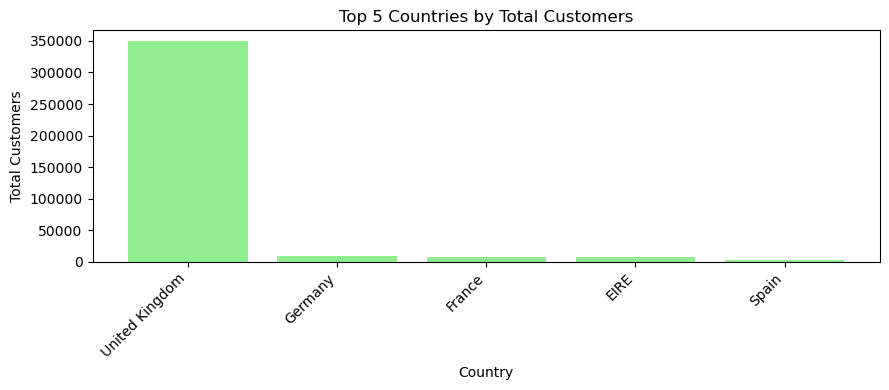

In [85]:

plt.figure(figsize=(9,4))
plt.bar(country_count.index, country_count.values, color='lightgreen')
plt.title('Top 5 Countries by Total Customers')
plt.xlabel('Country')
plt.ylabel('Total Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [86]:
# Aggregate revenue per country

country_rev = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

In [87]:
country_rev

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: Revenue, dtype: float64

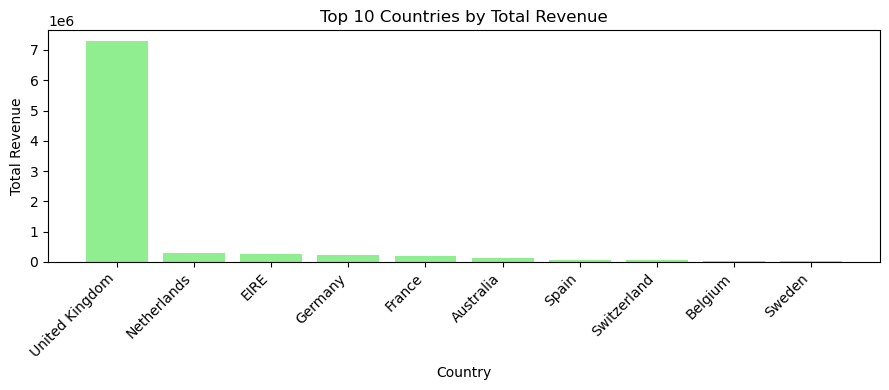

In [90]:

plt.figure(figsize=(9,4))
plt.bar(country_rev.index, country_rev.values, color='lightgreen')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# “1e6” in your plot’s y-axis means “1 × 10⁶” (i.e., one million)


In [92]:
df['InvoiceDate'].max()

Timestamp('2023-12-09 12:50:00')

In [93]:
df['InvoiceDate'].dt.year.unique()

array([2022, 2023])

In [97]:
df['InvoiceDate'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 392692, dtype: int32

In [99]:
# Create a month column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly = df.groupby('Month').agg({
    'Revenue':'sum',
    'InvoiceNo':'nunique'
}).reset_index()

monthly['Month'] = monthly['Month'].dt.to_timestamp()


In [101]:
monthly

,Month,Revenue,InvoiceNo
0,2022-12-01,570422.730,1400
1,2023-01-01,568101.310,987
2,2023-02-01,446084.920,997
3,2023-03-01,594081.760,1321
4,2023-04-01,468374.331,1149
5,2023-05-01,677355.150,1555
6,2023-06-01,660046.050,1393
7,2023-07-01,598962.901,1331
8,2023-08-01,644051.040,1280
9,2023-09-01,950690.202,1755


C:\Users\Ajay\AppData\Local\Temp\ipykernel_16480\8727499.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(country_counts.index, rotation=45, ha='right')


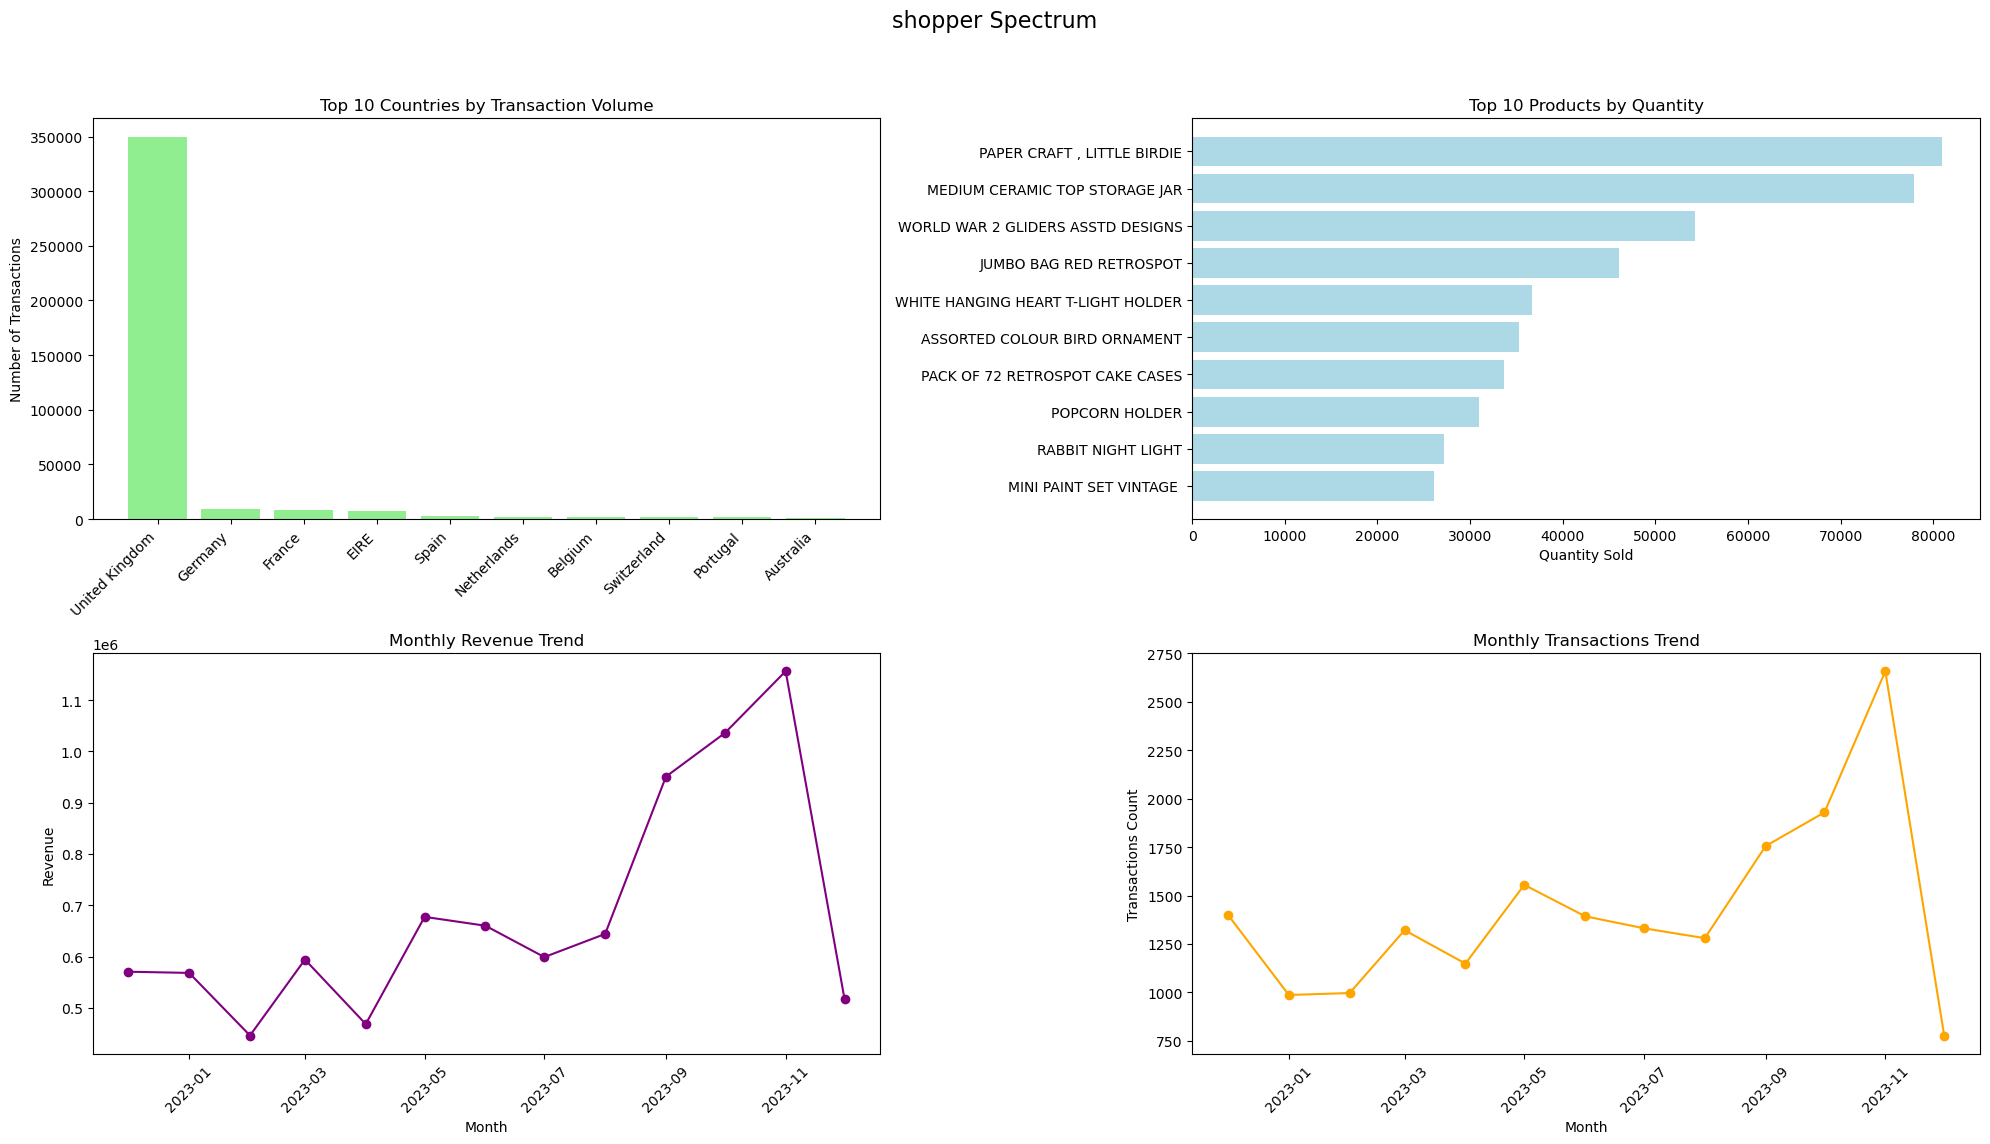

In [103]:

# Create subplots grid 2 rows × 3 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle("shopper Spectrum", fontsize=16)

# 1. Transaction volume by country (top 10)
country_counts = df['Country'].value_counts().head(10)
axes[0, 0].bar(country_counts.index, country_counts.values, color='lightgreen')
axes[0, 0].set_title('Top 10 Countries by Transaction Volume')
axes[0, 0].set_xticklabels(country_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Number of Transactions')

# 2. Top-selling products by quantity (top 10)
prod_qua = df.groupby(['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
axes[0, 1].barh(prod_qua.index.get_level_values(1), prod_qua.values, color='lightblue')
axes[0, 1].set_title('Top 10 Products by Quantity')
axes[0, 1].invert_yaxis()  # so the highest is on top
axes[0, 1].set_xlabel('Quantity Sold')

# 3.Montly revenue Trend
axes[1,0].plot(monthly['Month'], monthly['Revenue'], marker='o',color='purple')
axes[1,0].set_title("Monthly Revenue Trend")
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Revenue")
axes[1,0].tick_params(axis='x', rotation=45)

#4. Monthlly Transaction count
axes[1,1].plot(monthly['Month'], monthly['InvoiceNo'], marker='o',color='orange')
axes[1,1].set_title("Monthly Transactions Trend")
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("Transactions Count")
axes[1,1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


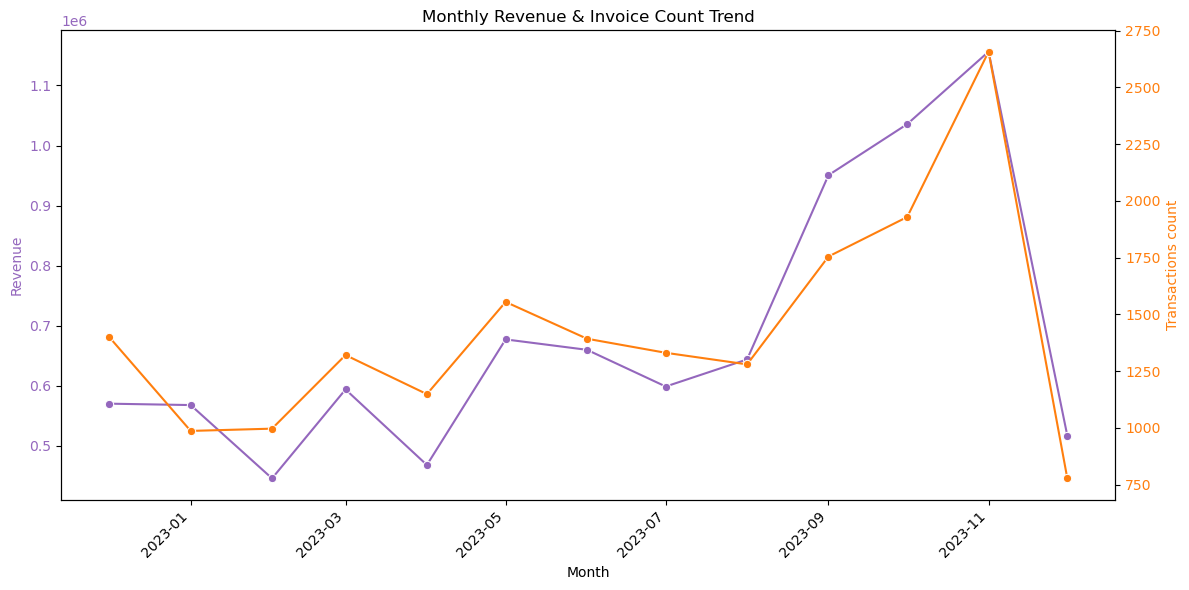

In [115]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Revenue on left y-axis
color1 = 'tab:purple'
sns.lineplot(data=monthly, x='Month', y='Revenue', marker='o', ax=ax1, color=color1)
ax1.set_xlabel("Month")
ax1.set_ylabel("Revenue", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
plt.xticks(rotation=45, ha='right')

# Create second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color2 = 'tab:orange'
sns.lineplot(data=monthly, x='Month', y='InvoiceNo', marker='o', ax=ax2, color=color2)
ax2.set_ylabel("Transactions count", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Monthly Revenue & Invoice Count Trend")
fig.tight_layout()
plt.show()


### In the above,

#### <b>* If revenue ↑ and number of invoices ↑:</b> business is getting more sales (volume is up).


#### <b>* If revenue ↑ but number of invoices is flat or ↓: </b> maybe each sale is larger (average spend per transaction is up).

#### <b>* If number of invoices ↑ but revenue doesn’t increase proportionally: </b> maybe many small transactions are happening (could impact profitability).
##


In [117]:
print("Dataset Statistics Summary:")
print()
print(f"Total number of customers: {df['CustomerID'].nunique()}")
print(f"Total number of products: {df['StockCode'].nunique()}")
print(f"Total number of transactions: {df['InvoiceNo'].nunique()}")
print(f"Date covered: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Total Revenue: Rs.{df['Revenue'].sum():,.2f}")

Dataset Statistics Summary:

Total number of customers: 4338
Total number of products: 3665
Total number of transactions: 18532
Date covered: 2022-12-01 08:26:00 to 2023-12-09 12:50:00
Total Revenue: Rs.8,887,208.89


In [119]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022-12
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12


In [121]:
df.shape

(392692, 10)

## Customer Segmentation

## RFM

In [125]:
df['InvoiceDate'].max()
latest_date=df['InvoiceDate'].max()
latest_date

Timestamp('2023-12-09 12:50:00')

In [127]:
rfm =df.groupby('CustomerID').agg({
    'InvoiceDate':'max',
    'InvoiceNo':'nunique',
    'Revenue':'sum'
    }).reset_index()

In [129]:
rfm = df.groupby('CustomerID',as_index=False).agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

In [130]:
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'}, inplace=True)

In [131]:
print(rfm.columns)


Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')


In [135]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


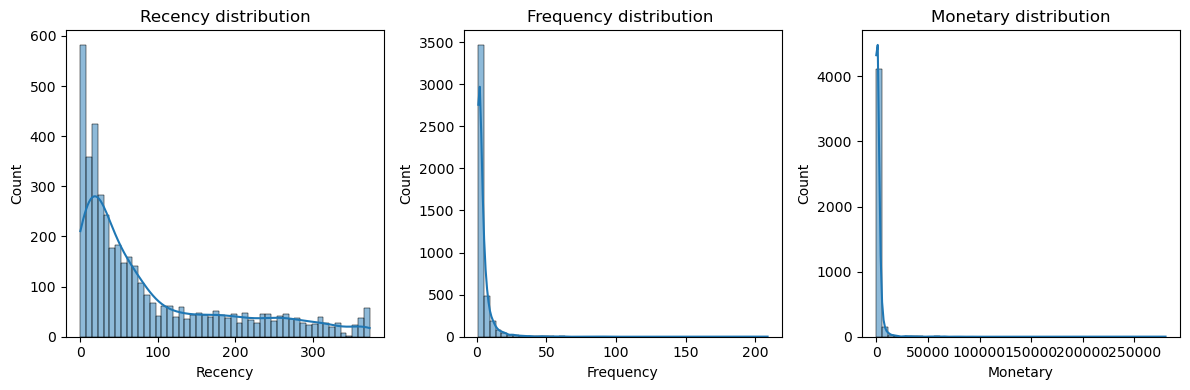

In [137]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=50, kde=True )
plt.title('Recency distribution')
plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=50, kde=True)
plt.title('Frequency distribution ')
plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title('Monetary distribution')
plt.tight_layout()
plt.show()


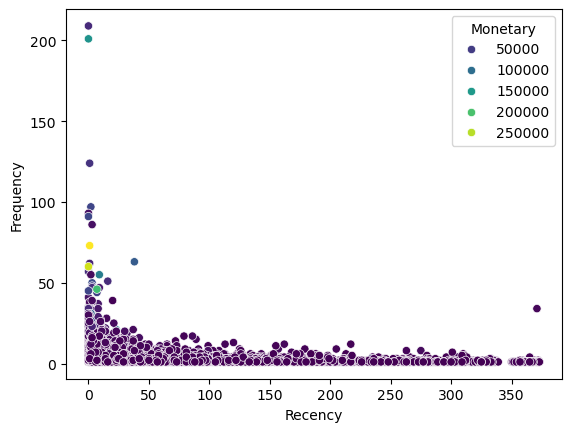

In [138]:
sns.scatterplot(data=rfm, x='Recency', y='Frequency',hue='Monetary',  palette='viridis')
plt.show()

In [140]:
# Lib import 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

In [142]:
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

In [143]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2045.53


In [144]:
rfm_scaled

array([[ 2.33457414e+00, -4.25096503e-01,  8.36301037e+00],
       [-9.05340320e-01,  3.54416797e-01,  2.51698905e-01],
       [-1.75359593e-01, -3.53398530e-02, -2.79878269e-02],
       ...,
       [-8.45341904e-01, -2.95177619e-01, -2.08214334e-01],
       [-8.85340848e-01,  1.52368675e+00, -3.51515172e-04],
       [-4.95351144e-01, -1.65258736e-01, -2.35311112e-02]])

In [163]:
wcss=[]
sil_score=[]
k_range=range(2,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    labels=kmeans.labels_
    sil_score.append(silhouette_score(rfm_scaled, labels))

In [220]:
# Here labels shows which cluster each sample belongs to.

# Then silhouette_score(X, labels) gives a quantitative measure of how good that clustering is.

array([3, 7, 0, ..., 0, 4, 0])

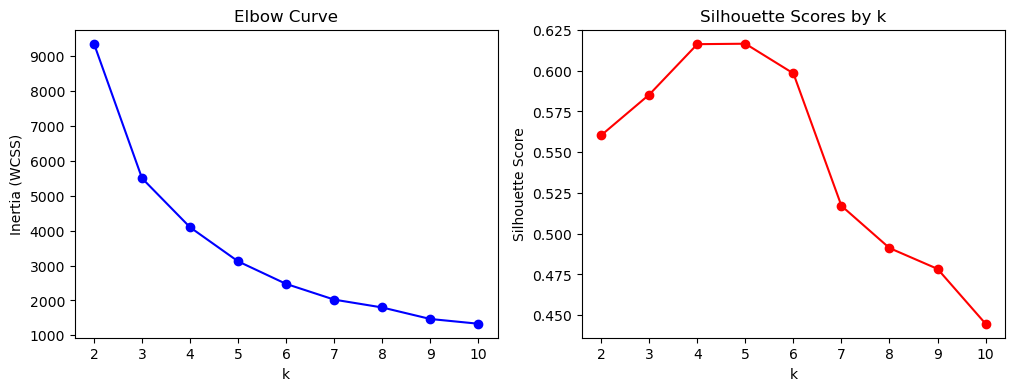

In [168]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Curve')
plt.subplot(1,2,2)
plt.plot(k_range, sil_score, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores by k')
plt.show()
plt.show()

In [170]:
k_best = 4  # choose based on plots + business sense

In [172]:
# Final clustering

kmeans_final = KMeans(n_clusters=k_best, random_state=42)
rfm['Cluster'] = kmeans_final.fit_predict(rfm_scaled)

In [222]:
kmeans_final.labels_

array([3, 0, 0, ..., 0, 3, 0])

In [174]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,3
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


In [176]:
kmeans_final

KMeans(n_clusters=4, random_state=42)

In [178]:
cluster_profile=rfm.groupby('Cluster', as_index=False).agg(
    Recency=('Recency', 'mean'),
Frequency=('Frequency','mean'),
Monetary=('Monetary','mean'),
No_of_Customers=('CustomerID', 'count')

)

In [180]:
cluster_profile

,Cluster,Recency,Frequency,Monetary,No_of_Customers
0,0,42.702685,3.682711,1353.625312,3054
1,1,247.075914,1.552015,478.848773,1067
2,2,6.384615,82.538462,127187.959231,13
3,3,14.500000,22.333333,12690.500392,204


1. High-Value/Champions(recent, very frequent, very high spend)
2. Loyal High-Spenders (recent, frequent, high spend but less extreme)
3. Occasional (moderate recency, low frequency, moderate spend)
4. At-Risk/Dormant (old recency, very low frequency, low spend)

In [183]:
# 12. Map cluster to segment labels (customise)
label_map = {2:'High-Value/Champions',3:'Loyal / Regular',0:'Occasional',1:'At-Risk/Dormant'}

rfm['Segment']=rfm['Cluster'].map(label_map)


In [185]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,325,1,77183.60,3,Loyal / Regular
1,12347.0,1,7,4310.00,0,Occasional
2,12348.0,74,4,1797.24,0,Occasional
3,12349.0,18,1,1757.55,0,Occasional
4,12350.0,309,1,334.40,1,At-Risk/Dormant


C:\Users\Ajay\AppData\Local\Temp\ipykernel_16480\1168029968.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', color='purple')


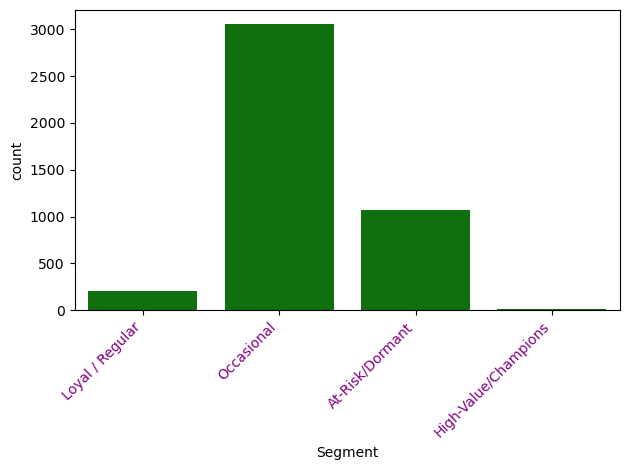

In [187]:

ax = sns.countplot(data=rfm, x='Segment',color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', color='purple')
plt.tight_layout()
plt.show()

In [195]:
df.to_csv('df.csv', index=False)

In [196]:
rfm.to_csv('rfm.csv', index=False)

In [197]:
import pickle
# scaler →  StandardScaler object  
# kmeans_model →  KMeans (clustering model)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the clustering model
with open('kmeans_final.pkl', 'wb') as f:
    pickle.dump(kmeans_final, f)

## Recommendation Sysstem

In [200]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022-12
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Revenue      392692 non-null  float64       
 9   Month        392692 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 33.0+ MB


In [202]:
from sklearn.metrics.pairwise import cosine_similarity
import joblib


#  Pre-process: keep relevant columns and positive purchases
df['CustomerID'] = df['CustomerID'].astype(int)


#  Create customer-product matrix (customers × products) using purchase count or revenue
cust_prod = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',     # or values='Revenue'
    aggfunc='sum',
    fill_value=0
)

# Compute item-item cosine similarity
item_sim = cosine_similarity(cust_prod.T)
sim_df = pd.DataFrame(item_sim, index=cust_prod.columns, columns=cust_prod.columns)

#  Persist similarity matrix for app
#joblib.dump(sim_df, 'item_similarity_matrix.joblib')


In [203]:
cust_prod.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
item_sim

array([[1.00000000e+00, 0.00000000e+00, 2.10529840e-05, ...,
        1.31545904e-02, 0.00000000e+00, 2.59884558e-03],
       [0.00000000e+00, 1.00000000e+00, 3.53353993e-03, ...,
        1.12378290e-02, 0.00000000e+00, 2.97932034e-02],
       [2.10529840e-05, 3.53353993e-03, 1.00000000e+00, ...,
        8.22963699e-01, 9.68965700e-05, 6.66541188e-03],
       ...,
       [1.31545904e-02, 1.12378290e-02, 8.22963699e-01, ...,
        1.00000000e+00, 6.98586162e-03, 2.46097842e-02],
       [0.00000000e+00, 0.00000000e+00, 9.68965700e-05, ...,
        6.98586162e-03, 1.00000000e+00, 1.19612129e-01],
       [2.59884558e-03, 2.97932034e-02, 6.66541188e-03, ...,
        2.46097842e-02, 1.19612129e-01, 1.00000000e+00]])

In [205]:
sim_df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.000000,0.000021,0.000228,0.000000,0.000000,0.020228,0.000000,0.000263,0.063543,...,0.000000,0.001376,0.015917,0.001771,0.000000,0.002852,0.000000,0.013155,0.000000,0.002599
50'S CHRISTMAS GIFT BAG LARGE,0.000000,1.000000,0.003534,0.004001,0.000000,0.020230,0.027477,0.902593,0.119038,0.013384,...,0.000000,0.001726,0.015572,0.018032,0.000000,0.015710,0.000000,0.011238,0.000000,0.029793
DOLLY GIRL BEAKER,0.000021,0.003534,1.000000,0.870965,0.980574,0.006358,0.005311,0.003040,0.001764,0.411471,...,0.000000,0.000044,0.002869,0.344928,0.000000,0.525868,0.000000,0.822964,0.000097,0.006665
I LOVE LONDON MINI BACKPACK,0.000228,0.004001,0.870965,1.000000,0.883987,0.020076,0.004912,0.004051,0.008249,0.382226,...,0.000000,0.001416,0.004198,0.310053,0.000000,0.471772,0.000000,0.749303,0.000000,0.010394
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.980574,0.883987,1.000000,0.000000,0.000000,0.000000,0.000000,0.410712,...,0.000000,0.000000,0.000000,0.347021,0.000000,0.530836,0.000000,0.837176,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,0.002852,0.015710,0.525868,0.471772,0.530836,0.017043,0.129770,0.015160,0.001125,0.231871,...,0.014745,0.009773,0.108995,0.585205,0.020853,1.000000,0.006385,0.483933,0.002333,0.133134
ZINC TOP 2 DOOR WOODEN SHELF,0.000000,0.000000,0.000000,0.000000,0.000000,0.023415,0.056614,0.000000,0.000368,0.000000,...,0.000000,0.000000,0.013708,0.025044,0.000000,0.006385,1.000000,0.013216,0.000000,0.000000
ZINC WILLIE WINKIE CANDLE STICK,0.013155,0.011238,0.822964,0.749303,0.837176,0.016976,0.022661,0.012949,0.000600,0.373983,...,0.000000,0.023041,0.028676,0.324531,0.000000,0.483933,0.013216,1.000000,0.006986,0.024610


In [218]:
# Assume you already have `sim_df` (product-product similarity DataFrame)
# and you have loaded it or computed it as described.

prod_name = input("Enter product description exactly: ")

if prod_name not in sim_df.index:
    print("Product not found. Please check spelling or try another.")
else:
    sims = sim_df[prod_name].sort_values(ascending=False)
    top5 = sims.index[1:6]   # skip itself at index 0
    print("Top 5 similar products:")
    for i, p in enumerate(top5, start=1):
        print(f"{i}. {p} (similarity = {sims[p]:.3f})")


Enter product description exactly:  RED WOOLLY HOTTIE WHITE HEART.


Top 5 similar products:
1. PINK MARSHMALLOW SCARF KNITTING KIT (similarity = 0.973)
2. CREAM SLICE FLANNEL PINK SPOT  (similarity = 0.966)
3. 6 CHOCOLATE LOVE HEART T-LIGHTS (similarity = 0.957)
4. LADS ONLY TISSUE BOX (similarity = 0.952)
5. ROSE SCENT CANDLE IN JEWELLED BOX (similarity = 0.924)


In [ ]:

#  similarity matrix 

joblib.dump(sim_df, 'item_similarity_matrix.joblib')